/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2024-06-19 11:31:45,160 - qm - INFO     - Starting session: 71364346-c97f-4bc3-8a8e-9bc001883b5b
Circuit context


/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/q_env_config.py:110: UserWarning: No backend was provided, State vector simulation will be used
  warnings.warn("No backend was provided, State vector simulation will be used")


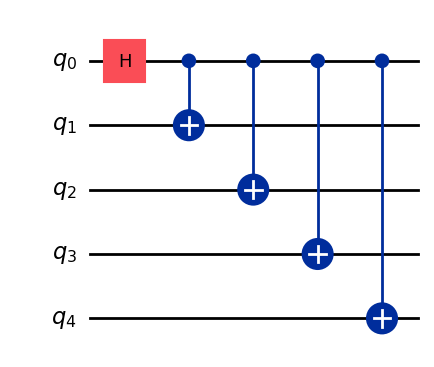

In [1]:
%matplotlib inline
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)
from template_configurations.qiskit.gate_level import (
    q_env_config as gate_q_env_config,
    circuit_context,
)
from quantumenvironment import QuantumEnvironmentV2
from context_aware_quantum_environment import ContextAwareQuantumEnvironmentV2
from gymnasium.wrappers import RescaleAction, ClipAction

from hpo_training_config import (
    HPOConfig,
    TotalUpdates,
    HardwareRuntime,
    TrainingConfig,
    TrainFunctionSettings
)

circuit_context.draw("mpl")

In [2]:
use_context = False
if use_context:
    q_env = ContextAwareQuantumEnvironmentV2(
        gate_q_env_config, circuit_context, training_steps_per_gate=250
    )
else:
    q_env = QuantumEnvironmentV2(gate_q_env_config)
rescaled_env = RescaleAction(ClipAction(q_env), -1.0, 1.0)

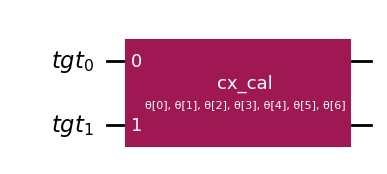

In [3]:
q_env.circuits[0].draw("mpl", style="iqp")

In [4]:
fig = None
if use_context:
    fig = q_env.circuit_context.draw("mpl")
fig

In [5]:
from helper_functions import load_from_yaml_file
from pathlib import Path

# Change the file_name to the name of the agent configuration file and specify the file location
file_name = "agent_config.yaml"
file_location = Path.cwd().parent.parent.parent / "template_configurations" / file_name

agent_config = load_from_yaml_file(file_location)

In [6]:
from ppoV2 import CustomPPOV2

ppo_agent = CustomPPOV2(agent_config, rescaled_env)

In [7]:
q_env.layout

[Layout({
 0: Qubit(QuantumRegister(2, 'tgt'), 0),
 1: Qubit(QuantumRegister(2, 'tgt'), 1)
 })]

In [8]:
total_updates = TotalUpdates(100)
# hardware_runtime = HardwareRuntime(300)
training_config = TrainingConfig(training_constraint=total_updates, target_fidelities=[0.999, 0.9999], lookback_window=10, anneal_learning_rate=False, std_actions_eps=1e-2)

train_function_settings = TrainFunctionSettings(
    plot_real_time=True,
    print_debug=True,
    num_prints=1,
    hpo_mode=False,
    clear_history=True
)

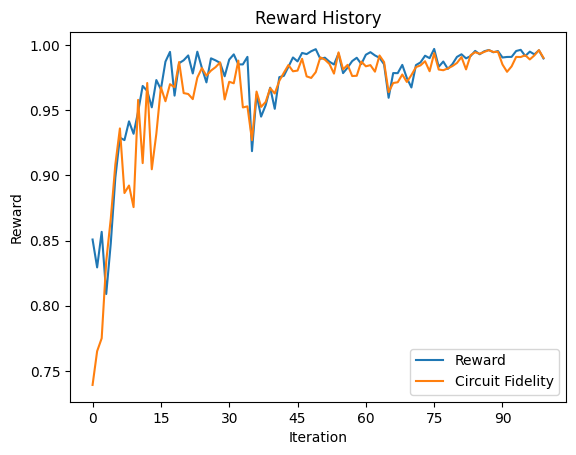

100%|██████████| 100/100 [00:40<00:00,  2.49it/s]

2024-06-19 11:32:26 INFO Target fidelity 0.999 not achieved within TotalUpdates(total_updates=100).
2024-06-19 11:32:26 INFO Target fidelity 0.9999 not achieved within TotalUpdates(total_updates=100).


In [9]:
training_results = ppo_agent.train(
    training_config=training_config,
    train_function_settings=train_function_settings
)

In [10]:
training_results['env_ident_str']

'gate_calibration_cx-gate_physical_qubits_0-1'

In [11]:
list(training_results.keys())

['env_ident_str',
 'reward_method',
 'training_constraint',
 'avg_reward',
 'std_action',
 'fidelity_history',
 'hardware_runtime',
 'action_history',
 'best_action_vector',
 'total_shots',
 'total_updates',
 'n_reps',
 'fidelity_info']

In [12]:
training_results['action_history']  

[array([ 0.01419712,  0.02981224, -0.09261631, -0.09903271,  0.11752845,
        -0.11546482, -0.10732491], dtype=float32),
 array([ 0.01374115, -0.00152852, -0.06128932, -0.12310809,  0.09112062,
        -0.0842342 , -0.13133474], dtype=float32),
 array([ 0.01376647,  0.00239343, -0.10966019, -0.09709796,  0.06418377,
        -0.05036414, -0.14274648], dtype=float32),
 array([-0.01625461,  0.03560538, -0.05444779, -0.1627184 ,  0.11574046,
        -0.01099165, -0.11387523], dtype=float32),
 array([ 0.00733628,  0.04424594, -0.061498  , -0.17564961,  0.12320188,
        -0.03023929, -0.12811352], dtype=float32),
 array([ 0.00976558,  0.03513915, -0.01864641, -0.13348982,  0.11377443,
        -0.021437  , -0.09789387], dtype=float32),
 array([-0.01419653,  0.02194152,  0.0113219 , -0.10320511,  0.09061353,
        -0.05965672, -0.10697974], dtype=float32),
 array([ 0.00110366,  0.00863843, -0.03598983, -0.06456055,  0.04832873,
        -0.02876302, -0.09740654], dtype=float32),
 array([

In [13]:
q_env.unwrapped.optimal_action

array([0., 0., 0., 0., 0., 0., 0.])